<a href="https://colab.research.google.com/github/hyunseo-hy/Python-for-Finance-Practice/blob/main/mat_and_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [117]:
plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

                      a            b            c
2018-09-01  1050.178577   991.825203  1081.634054
2018-09-02  1079.599435   984.392202  1041.245061
2018-09-03   872.886346  1049.942105   937.004432
2018-09-04   999.636917   960.144330   990.721042
2018-09-05  1006.369667   985.994714  1039.492337


<Axes: >

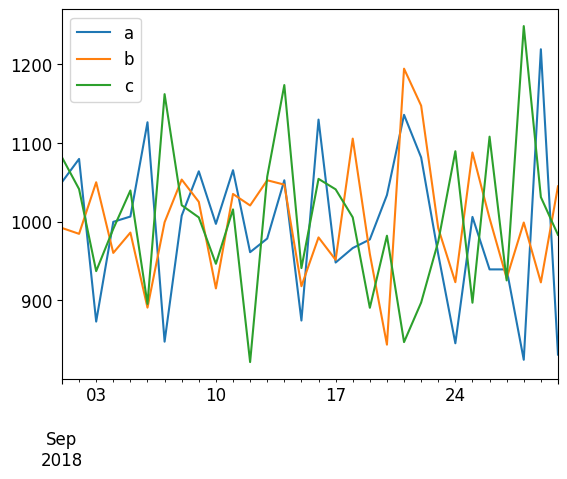

In [118]:
df = pd.DataFrame(np.random.randn(30,3)*100+1000,
                  index = pd.date_range(start="20180901", periods=30, freq='d'),
                  columns = ['a','b','c'])
print(df.head())
df.plot.line()

<Axes: ylabel='date'>

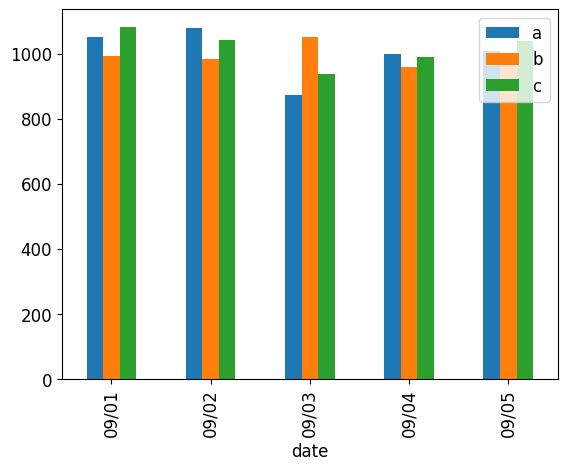

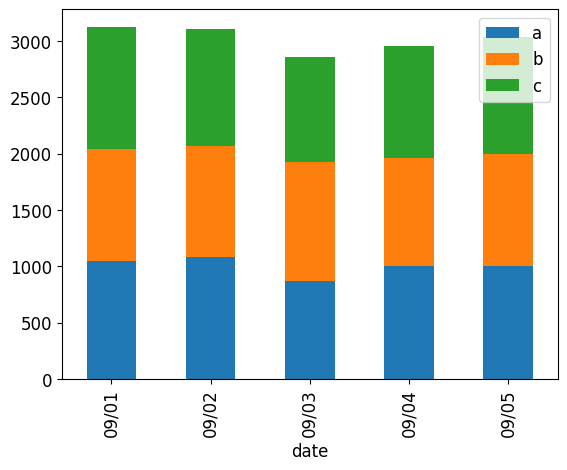

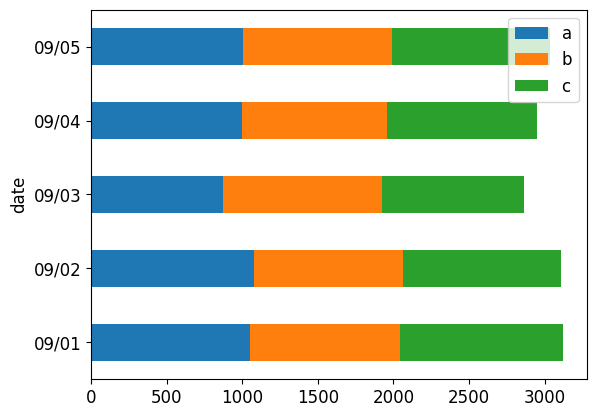

In [119]:
df_temp = df[:5].reset_index()
df_temp['index'] = df_temp['index'].dt.strftime('%m/%d')
df_temp = df_temp.rename(columns={"index":'date'})
df_temp.plot.bar(x='date')
df_temp.plot.bar(x='date', stacked=True)
df_temp.plot.barh(x='date',stacked=True)

<Axes: ylabel='Frequency'>

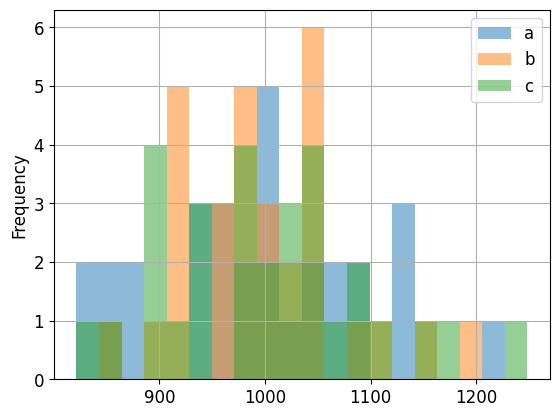

In [120]:
df.plot.hist(bins=20, grid=True, alpha=0.5)

<Axes: >

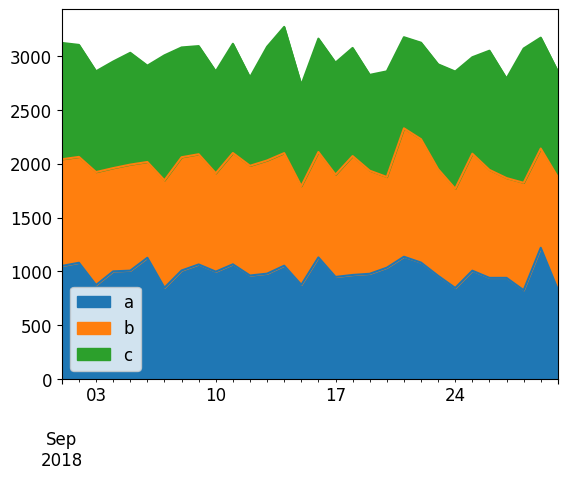

In [121]:
df.plot.area(stacked=True)

<Axes: ylabel='2018-09-01 00:00:00'>

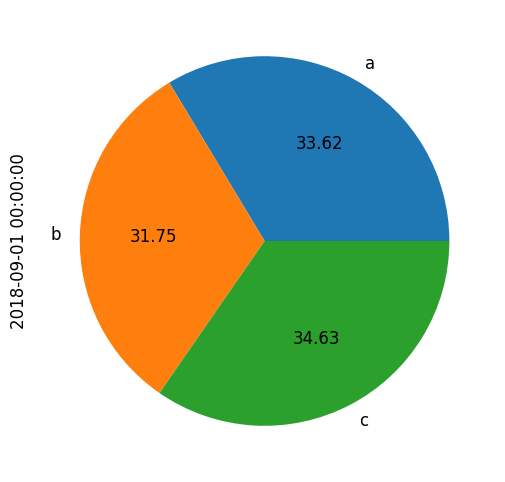

In [122]:
df.iloc[0].plot.pie(figsize = (6,6),autopct='%.2f')

<Axes: ylabel='Density'>

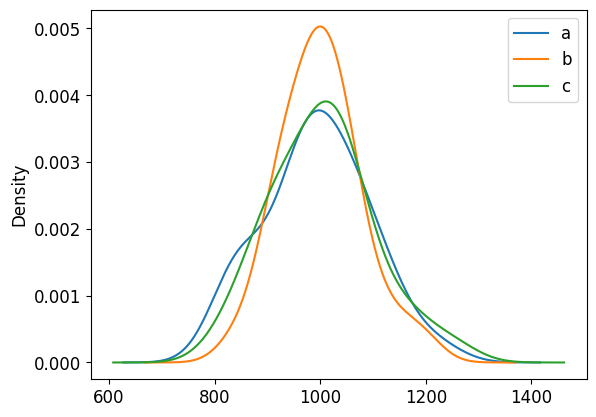

In [123]:
df.plot.kde()

<Axes: >

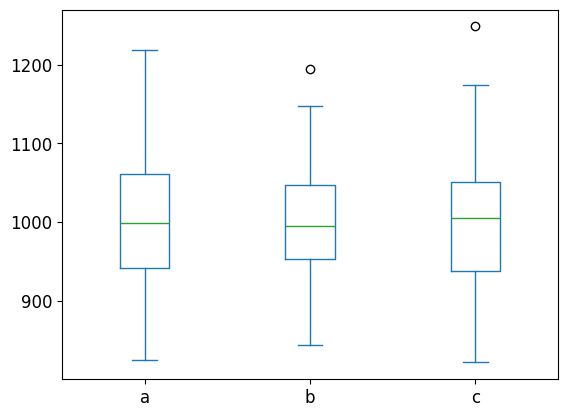

In [124]:
df.plot.box()

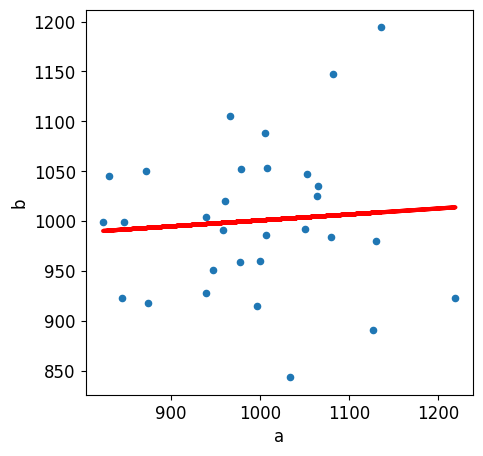

In [125]:
df.plot.scatter(x='a', y='b', figsize=(5,5))
regr = LinearRegression()
X = df[['a']]
y = df['b']
regr.fit(X, y)
plt.plot(X, regr.predict(X), color="r", linewidth=3)

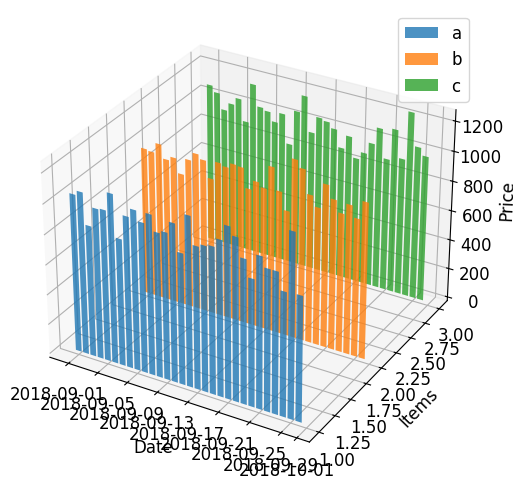

In [126]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

for z,n in zip([1,2,3],df.columns):
  left=df[n].index
  height = df[n].values
  zs = z
  ax.bar(left,height,zs,zdir="y", alpha=0.8)

ax.set_xlabel("Date")
ax.set_ylabel("Items")
ax.set_zlabel("Price")

ax.legend(df.columns)

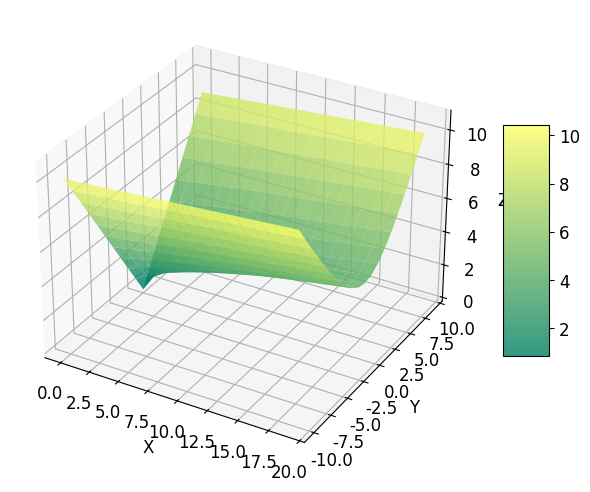

In [134]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

X=np.arange(0,20)
Y=np.arange(-10,10)
X,Y = np.meshgrid(X,Y)
Z = np.sqrt(Y**2+X)

surf = ax.plot_surface(X,Y,Z, cmap=cm.summer, linewidth=1, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel("Y")
ax.set_zlabel('Z')
fig.colorbar(surf,shrink=0.5,aspect=5)